# Workshop Deliverables

1. Extracting and plotting velocity and pressure along the probe points.
2. Extracting and plotting force coefficient data.
3. Computing FFT using probe point pressure and force data.
4. Extracting and plotting Data along multiple lines from the simulations.
5. Extracting 2D slice data and visualizing it.

# Import Necessary Modules

In [22]:
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import os
%matplotlib inline
plt.rcParams.update({'font.size' : 14, 'font.family' : 'Times New Roman', "text.usetex": True})
#plt.rcParams.update(plt.rcParamsDefault)


# Set the Path variables

In [2]:
Path = 'E:/Blog_Posts/Simulations/2CylRe75/2Cylinder_Re75/'
save_path = 'E:/Blog_Posts/Workshop_Save/'

# 1. Extracting and plotting velocity and pressure along the probe points.

We will be using `fluidfoam` package. This package is specifically tailored for OpenFOAM. `fluidfoam` offers python classes designed for straightforward post-processing of OpenFOAM data. 

In [3]:
import fluidfoam as fl

#### Read probes of U and p

In [4]:
probes_locU, timeU, u = fl.readpostpro.readprobes(Path,
                                                  probes_name='postProcessing/probes',
                                                  time_name='latestTime',
                                                  name='U')

Reading file E:/Blog_Posts/Simulations/2CylRe75/2Cylinder_Re75\postProcessing\probes\2000\U
13 probes over 4000 timesteps


In [5]:
probes_locP, timeP, P = fl.readpostpro.readprobes(Path,
                                                  probes_name='postProcessing/probes',
                                                  time_name='latestTime',
                                                  name='p')

Reading file E:/Blog_Posts/Simulations/2CylRe75/2Cylinder_Re75\postProcessing\probes\2000\p
13 probes over 4000 timesteps


In [6]:
### Probe Locations 
Locations = probes_locU/0.1
print(Locations)

[[ 1.5  0.5  0. ]
 [ 1.5  0.   0. ]
 [ 1.5 -0.5  0. ]
 [ 3.5  1.   0. ]
 [ 3.5  0.5  0. ]
 [ 3.5  0.   0. ]
 [ 3.5 -0.5  0. ]
 [ 3.5 -1.   0. ]
 [ 5.5  1.   0. ]
 [ 5.5 -0.5  0. ]
 [ 5.5  0.   0. ]
 [ 5.5 -0.5  0. ]
 [ 5.5 -1.   0. ]]


#### Velocity at probe locations 
#### u[ probes list (all or index),  Probe location (from Probes_locU),  position (ux, uy, uz) = (0,1,2)]

In [7]:
print(u[:, 4, 0])

[0.0143149  0.01434139 0.01436697 ... 0.01110916 0.01113126 0.01115418]


#### Pressure at probe locations 
#### P[ probes list (all or index),  Probe location (from Probes_locU),  position  = 0]

In [8]:
print(P[:, 4, 0])

[-1.6209700e-05 -1.5908664e-05 -1.5556256e-05 ... -5.5495688e-06
 -5.7656849e-06 -5.9745531e-06]


#### Plot Velocity and Pressure, Compute Mean

Mean =  0.012695165728500001


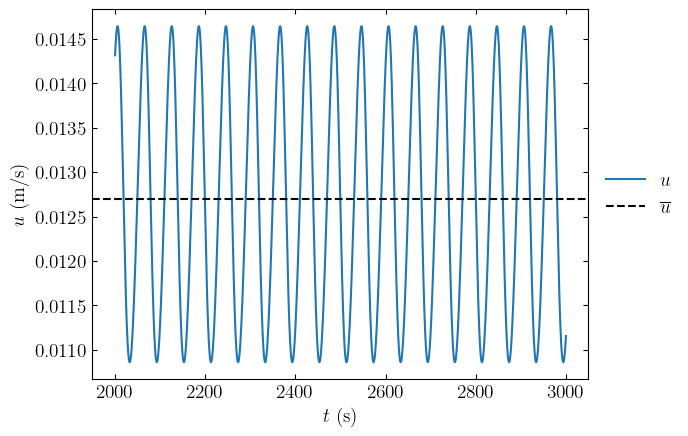

In [9]:
fig, ax = plt.subplots()
ax.plot(timeU, u[:, 4, 0], label=r'$u$')
ax.axhline(np.mean(u[:, 4, 0]), color='k', linestyle='--', label=r'$\overline{u}$')

ax.set_ylabel(r'$u$ (m/s)')
ax.set_xlabel(r'$t$ (s)')

ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.legend(loc = 'center left', frameon = False, bbox_to_anchor = (1, 0.5))

print('Mean = ', np.mean(u[:, 4, 0]))

# plt.savefig(save_path + 'probeVelocity.jpeg', dpi = 300, bbox_inches = 'tight')

plt.show()

Mean =  -7.2796443634135e-06


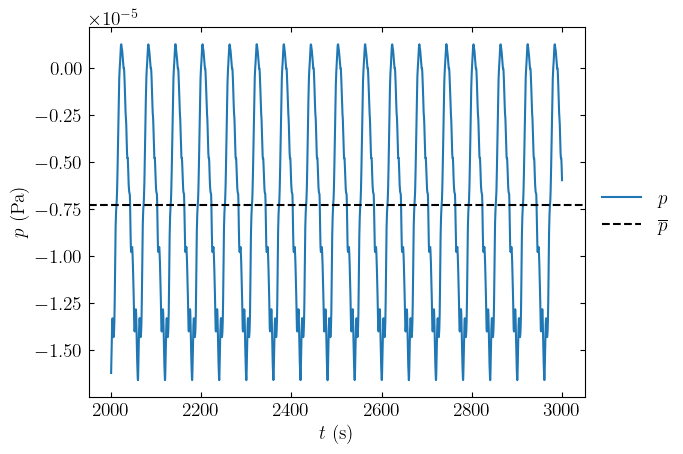

In [10]:
fig, ax = plt.subplots()
ax.plot(timeP[:], P[:, 4, 0], label=r'$p$')
ax.axhline(np.mean(P[:, 4, 0]), color='k', linestyle='--', label=r'$\overline{p}$')

ax.set_ylabel(r'$p$ (Pa)')
ax.set_xlabel(r'$t$ (s)')

ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.legend(loc = 'center left', frameon = False, bbox_to_anchor = (1, 0.5))

print('Mean = ', np.mean(P[:, 4, 0]))

# plt.savefig(save_path + 'probeVelocity.jpeg', dpi = 300, bbox_inches = 'tight')

plt.show()

# 2. Extracting and plotting force coefficient data.

In [11]:
forces_Coefficients1 = fl.readpostpro.readforce(Path,
                                                namepatch='postProcessing/forces1',
                                                time_name='latestTime',
                                                name='coefficient')

In [12]:
forces_Coefficients2 = fl.readpostpro.readforce(Path,
                                                namepatch='postProcessing/forces2',
                                                time_name='latestTime',
                                                name='coefficient')

In [13]:
Forces1 = pd.DataFrame(forces_Coefficients1, 
                       columns=['Time','Cd','Cs','Cl','CmRoll','CmPitch','CmYaw','Cdf','Cdr','Csf','Csr','Clf','Clr'])

Forces2 = pd.DataFrame(forces_Coefficients2, 
                       columns=['Time','Cd','Cs','Cl','CmRoll','CmPitch','CmYaw','Cdf','Cdr','Csf','Csr','Clf','Clr'])


In [14]:
Forces1

,Time,Cd,Cs,Cl,CmRoll,CmPitch,CmYaw,Cdf,Cdr,Csf,Csr,Clf,Clr
0,2000.25,1.747540,0.873770,0.873770,0.036106,4.377704,-4.341597,4.359650,1.518664e-08,3.877922e-09,-5.048045e-09,1.353899e-09,-6.401944e-09
1,2000.50,1.747895,0.873947,0.873947,0.027957,4.369951,-4.341995,4.355973,1.518087e-08,3.877313e-09,-5.046265e-09,1.354181e-09,-6.400446e-09
2,2000.75,1.748287,0.874143,0.874143,0.019830,4.362313,-4.342484,4.352398,1.517503e-08,3.876643e-09,-5.044455e-09,1.354416e-09,-6.398871e-09
3,2001.00,1.748680,0.874340,0.874340,0.011709,4.354704,-4.342995,4.348849,1.516914e-08,3.875912e-09,-5.042615e-09,1.354605e-09,-6.397219e-09
4,2001.25,1.749049,0.874525,0.874525,0.003619,4.347070,-4.343451,4.345260,1.516319e-08,3.875119e-09,-5.040746e-09,1.354746e-09,-6.395493e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2999.00,1.735708,0.867854,0.867854,0.298598,4.636391,-4.337792,4.487092,1.521034e-08,3.740304e-09,-5.029211e-09,1.225698e-09,-6.254909e-09
3996,2999.25,1.735904,0.867952,0.867952,0.303809,4.642305,-4.338496,4.490400,1.521540e-08,3.742351e-09,-5.031095e-09,1.226804e-09,-6.257899e-09
3997,2999.50,1.736137,0.868069,0.868069,0.308844,4.648124,-4.339280,4.493702,1.522038e-08,3.744430e-09,-5.032962e-09,1.227949e-09,-6.260911e-09
3998,2999.75,1.736364,0.868182,0.868182,0.313735,4.653766,-4.340032,4.496899,1.522529e-08,3.746538e-09,-5.034812e-09,1.229133e-09,-6.263944e-09


Mean Drag Coefficient =  1.749258021835
Mean Lift Coefficient =  0.87462899583075


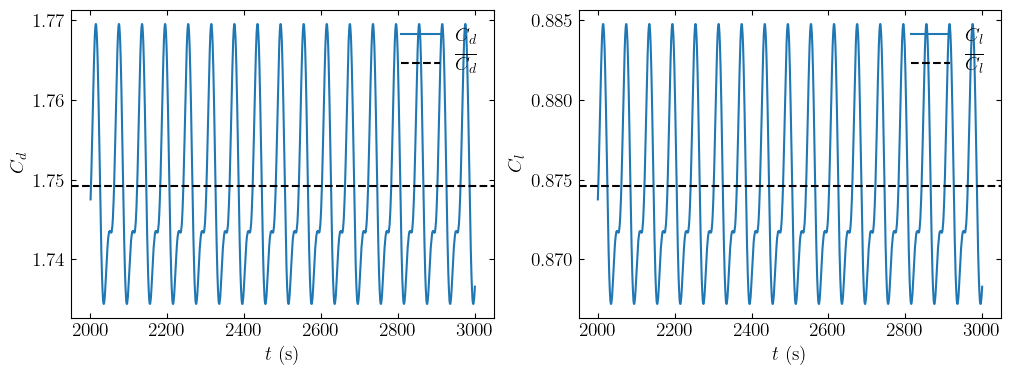

In [15]:
fig, axes = plt.subplots(1,2, figsize = (12,4))

ax = axes[0]

ax.plot(Forces1.Time, Forces1.Cd, label=r'$C_d$')
ax.axhline(np.mean(Forces1.Cd), color='k', linestyle='--', label=r'$\overline{C_d}$')

ax.set_ylabel(r'$C_d$')
ax.set_xlabel(r'$t$ (s)')

ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

print('Mean Drag Coefficient = ', np.mean(Forces1.Cd))

ax.legend(loc = 'upper right', frameon = False) # or 'best', 'upper right', etc

# ax.set_xlim(1000, 2000)
# ax.set_ylim(1.7, 1.8)

ax = axes[1]

ax.plot(Forces1.Time, Forces1.Cl, label=r'$C_l$')
ax.axhline(np.mean(Forces1.Cl), color='k', linestyle='--', label=r'$\overline{C_l}$')

ax.set_ylabel(r'$C_l$')
ax.set_xlabel(r'$t$ (s)')

ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

print('Mean Lift Coefficient = ', np.mean(Forces1.Cl))

ax.legend(loc = 'upper right', frameon = False) # or 'best', 'upper right', etc

# ax.set_xlim(1000, 2000)
# ax.set_ylim(0.85, 0.9)

# plt.savefig(save_path + 'Forces.jpeg', dpi = 300, bbox_inches = 'tight')

plt.show()

### Validation Ma et al. (2017) at $Re = 75$ and $g/D = 4$

Ma et al. (2017) : $C_d \approx 1.76$

Present Results : $C_d \approx 1.75$

Mean Drag Coefficient =  1.7492582639325
Mean Lift Coefficient =  0.874629125466


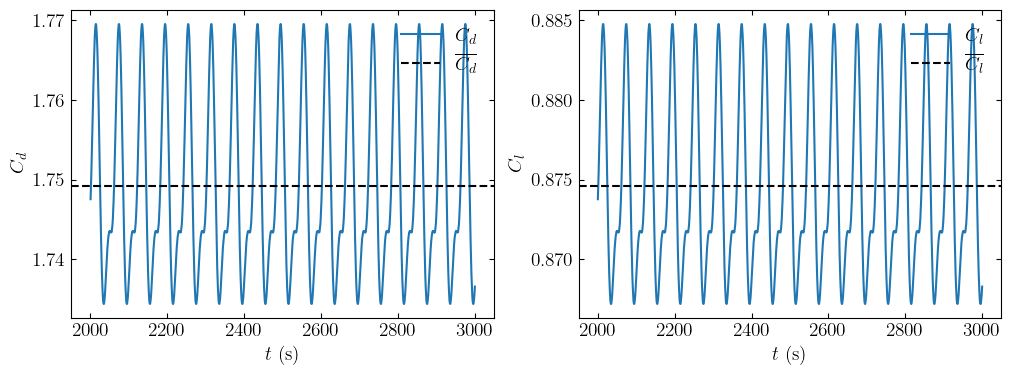

In [16]:
fig, axes = plt.subplots(1,2, figsize = (12,4))

ax = axes[0]

ax.plot(Forces2.Time, Forces2.Cd, label=r'$C_d$')
ax.axhline(np.mean(Forces2.Cd), color='k', linestyle='--', label=r'$\overline{C_d}$')

ax.set_ylabel(r'$C_d$')
ax.set_xlabel(r'$t$ (s)')

ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

print('Mean Drag Coefficient = ', np.mean(Forces2.Cd))

ax.legend(loc = 'upper right', frameon = False) # or 'best', 'upper right', etc

# ax.set_xlim(1000, 2000)
# ax.set_ylim(1.7, 1.8)

ax = axes[1]

ax.plot(Forces2.Time, Forces2.Cl, label=r'$C_l$')
ax.axhline(np.mean(Forces2.Cl), color='k', linestyle='--', label=r'$\overline{C_l}$')

ax.set_ylabel(r'$C_l$')
ax.set_xlabel(r'$t$ (s)')

ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

print('Mean Lift Coefficient = ', np.mean(Forces2.Cl))

ax.legend(loc = 'upper right', frameon = False) # or 'best', 'upper right', etc

# ax.set_xlim(1000, 2000)
# ax.set_ylim(0.85, 0.9)

# plt.savefig(save_path + 'Forces.jpeg', dpi = 300, bbox_inches = 'tight')

plt.show()

# 3. Computing FFT using probe point pressure and force data.

### FFT of Velocity Probe

Strouhal Number =  0.15111111111111114


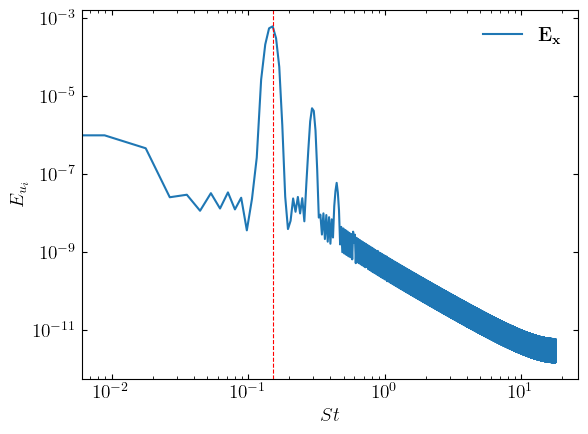

In [17]:
### FFT 

### Constants
d = 0.1
Ub = 0.01125
dt = 0.25
fs = 1/dt

Signal1 = u[:, 4, 0]

### PSD using welch
f1, Eu1 = sp.signal.welch(Signal1, fs, nfft = len(Signal1), nperseg=len(Signal1)/2, window='hamming')
St1 = f1*d/Ub

fig, ax = plt.subplots()

ax.loglog(St1, Eu1, label = (r'$\bf E_x$'))

xmax = St1[np.argmax(Eu1*f1/(Ub**2))]
print("Strouhal Number = ", xmax)

ax.axvline(xmax, c='r', ls='--', lw=0.8)

ax.legend(loc='best', frameon = False); # or 'best', 'upper right', etc
ax.set_xlabel(r'$St$')
ax.set_ylabel(r'$E_{u_i}$')
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

# plt.savefig(save_path + 'Power.jpeg', dpi = 300, bbox_inches = 'tight')

plt.show()

### FFT of Lift Coefficient

Strouhal Number =  0.15111111111111114


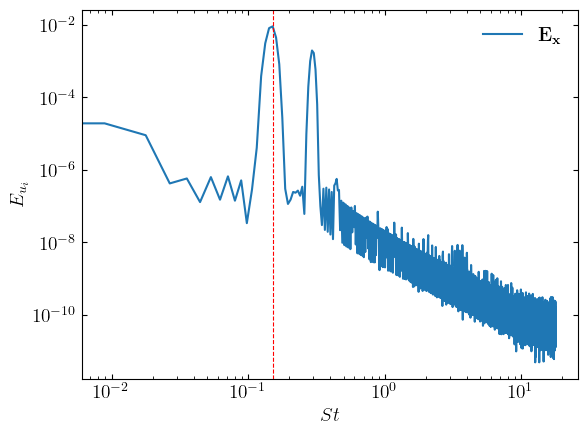

In [19]:
### FFT 

### Constants
d = 0.1
Ub = 0.01125
dt = 0.25
fs = 1/dt

Signal1 = Forces1.Cl

### PSD using welch
f1, Eu1 = sp.signal.welch(Signal1, fs, nfft = len(Signal1), nperseg=len(Signal1)/2, window='hamming')
St1 = f1*d/Ub

fig, ax = plt.subplots()

ax.loglog(St1, Eu1, label = (r'$\bf E_x$'))

xmax = St1[np.argmax(Eu1*f1/(Ub**2))]
print("Strouhal Number = ", xmax)

ax.axvline(xmax, c='r', ls='--', lw=0.8)

ax.legend(loc='best', frameon = False); # or 'best', 'upper right', etc
ax.set_xlabel(r'$St$')
ax.set_ylabel(r'$E_{u_i}$')
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

# plt.savefig(save_path + 'Power.jpeg', dpi = 300, bbox_inches = 'tight')

plt.show()

### Validation Ma et al. (2017) at $Re = 75$ and $g/D = 4$

Ma et al. (2017) : $St \approx 0.15$

Present Results : $St \approx 0.151$

# 4. Extracting and plotting Data along multiple lines from the simulations.

Step 1 : create a file names Multiple lines in system folder of your case : `touch MultipleLines`

Step 2 : Copy the following function object into the file

```bash
/*--------------------------------*- C++ -*----------------------------------*\
  =========                 |
  \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox
   \\    /   O peration     | Website:  https://openfoam.org
    \\  /    A nd           | Version:  7
     \\/     M anipulation  |
-------------------------------------------------------------------------------
Description
    Writes graph data for specified fields along a line, specified by start
    and end points.

\*---------------------------------------------------------------------------*/


// Sampling and I/O settings
#includeEtc "caseDicts/postProcessing/graphs/sampleDict.cfg"

type            sets;
libs            ("libsampling.so");

writeControl    writeTime;

interpolationScheme cellPoint;

setFormat   csv;

setConfig
{
    type    uniform;
    axis    xyz;  // x, y, z, xyz
	nPoints	1000;
}

sets
(
    line1
    {
        $setConfig;
        start   (0 0 0.05);
		end     (2.35 0 0.05);
    }
	
	line2
    {
        $setConfig;
        start (0.4 1.2 0.05);
        end   (0.4 -1.2 0.05);
    }
	
	line3
    {
        $setConfig;
        start (0.8 1.2 0.05);
        end   (0.8 -1.2 0.05);
    }
);

fields  (U p UMean pMean UPrime2Mean);

// ************************************************************************* //
```

Step 3 : Use CLI post-processing utility to extract data along the line : `postProcess -func MultipleLines`

Step 4 : Read `csv` files into python

Easy!!!

In [30]:
Path = 'E:/Blog_Posts/Simulations/Square_Cylinder_Laminar/SquareCylinder_Re100/postProcessing/'
LineData = 'MultipleLines/2970/' ### Chosing the latest time, t = 2970

In [31]:
Files = os.listdir(Path + LineData)
print(Files)

['line1_p_pMean_U_UMean_UPrime2Mean.csv', 'line2_p_pMean_U_UMean_UPrime2Mean.csv', 'line3_p_pMean_U_UMean_UPrime2Mean.csv']


In [33]:
Line1 = pd.read_csv(Path + LineData + Files[0])
Line2 = pd.read_csv(Path + LineData + Files[1])
Line3 = pd.read_csv(Path + LineData + Files[2])

Line1

,x,y,z,p,pMean,U_0,U_1,U_2,UMean_0,UMean_1,UMean_2,UPrime2Mean_0,UPrime2Mean_1,UPrime2Mean_2,UPrime2Mean_3,UPrime2Mean_4,UPrime2Mean_5
0,0.051752,1.654361e-24,0.05,-0.000071,-0.000065,-0.000007,0.000272,3.563788e-19,-0.000006,-5.616732e-07,2.639725e-19,8.947564e-11,-7.252629e-13,-1.780733e-26,5.166889e-08,3.989233e-26,1.729368e-33
1,0.054104,8.271806e-25,0.05,-0.000071,-0.000065,-0.000033,0.000550,8.570127e-19,-0.000030,-1.287017e-06,6.347438e-19,4.770547e-10,-5.488392e-12,5.879792e-26,2.115934e-07,2.840354e-25,9.807761e-33
2,0.056456,4.963084e-24,0.05,-0.000071,-0.000065,-0.000077,0.000742,1.389659e-18,-0.000069,-1.960181e-06,1.029111e-18,2.232505e-09,-1.585139e-11,-7.227424e-26,4.308452e-07,6.960587e-25,2.576917e-32
3,0.058809,-4.135903e-24,0.05,-0.000071,-0.000066,-0.000136,0.000862,1.955964e-18,-0.000122,-2.566252e-06,1.448301e-18,6.219200e-09,-3.024780e-11,-7.415531e-25,6.659706e-07,1.206919e-24,5.102344e-32
4,0.061161,0.000000e+00,0.05,-0.000071,-0.000066,-0.000207,0.000928,2.556102e-18,-0.000185,-3.099486e-06,1.892534e-18,1.305168e-08,-4.601741e-11,-2.504632e-24,8.910840e-07,1.765166e-24,8.707317e-32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,2.340591,-8.271806e-25,0.05,-0.000008,-0.000005,0.012124,0.000810,-6.803659e-11,0.012116,-8.476098e-06,-6.821874e-11,1.034196e-06,-1.115385e-09,-5.677339e-15,5.995424e-06,3.248539e-18,1.231536e-22
974,2.342943,1.654361e-24,0.05,-0.000008,-0.000005,0.012119,0.000749,-6.898046e-11,0.012112,-8.459515e-06,-6.916609e-11,1.033004e-06,-1.094350e-09,-5.752007e-15,5.933685e-06,3.278768e-18,1.247457e-22
975,2.345295,-4.135903e-25,0.05,-0.000008,-0.000005,0.012114,0.000688,-6.992432e-11,0.012108,-8.442932e-06,-7.011343e-11,1.031811e-06,-1.073315e-09,-5.826676e-15,5.871946e-06,3.308997e-18,1.263378e-22
976,2.347648,0.000000e+00,0.05,-0.000008,-0.000005,0.012109,0.000628,-7.086818e-11,0.012105,-8.426349e-06,-7.106077e-11,1.030618e-06,-1.052280e-09,-5.901345e-15,5.810207e-06,3.339227e-18,1.279300e-22


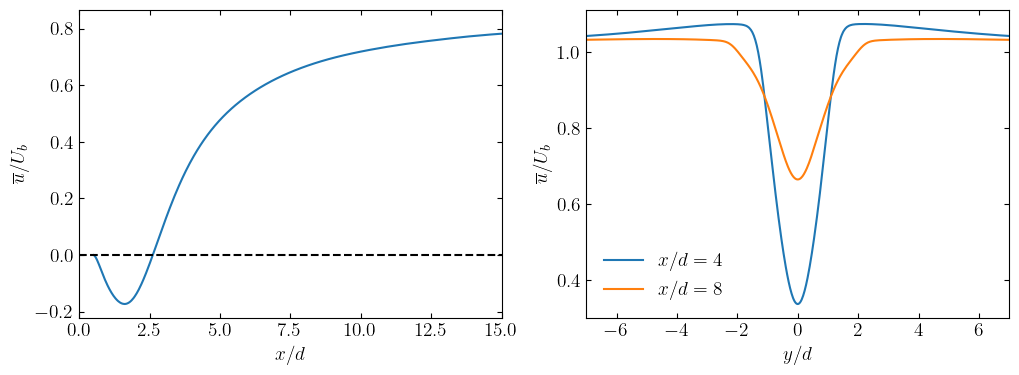

In [34]:
### plot mean axial velocity profiles

d = 0.1
Ub = 0.015

fig, axes = plt.subplots(1,2, figsize = (12,4))

ax = axes[0]

ax.plot(Line1.x/d, Line1.UMean_0/Ub)
ax.axhline(0, color = 'k', linestyle = '--')

ax.set_ylabel(r'$\overline{u}/U_b$')
ax.set_xlabel(r'$x/d$')

ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.set_xlim(0, 15)

ax = axes[1]

ax.plot(Line2.y/d, Line2.UMean_0/Ub, label = r'$x/d = 4$')
ax.plot(Line3.y/d, Line3.UMean_0/Ub, label = r'$x/d = 8$')

ax.set_ylabel(r'$\overline{u}/U_b$')
ax.set_xlabel(r'$y/d$')

ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.legend(loc = 'best', frameon = False) # or 'best', 'upper right', etc

ax.set_xlim(-7, 7)

# plt.savefig(save_path + 'Velocity_Plots.jpeg', dpi = 300, bbox_inches = 'tight')

plt.show()

# 5. Extracting 2D slice data and visualizing it.

Step 1 : Compute vorticity using OpenFOAM CLI : `postProcess -func vorticity`

Step 2 : Create a file names `surfaces` in system folder of your case

Step 3 : Copy the following function object into the file

```bash
/*--------------------------------*- C++ -*----------------------------------*\
  =========                 |
  \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox
   \\    /   O peration     |
    \\  /    A nd           | Web:      www.OpenFOAM.com
     \\/     M anipulation  |
-------------------------------------------------------------------------------
Description
    Writes out values of fields from cells nearest to specified locations.

\*---------------------------------------------------------------------------*/
surfaces
{
    type            surfaces;
    libs            ("libsampling.so");
    writeControl   	timeStep;
    writeInterval   142;

    surfaceFormat   vtk;
    fields          (p U vorticity);

    interpolationScheme cellPoint;

    surfaces
    {
        zNormal
        {
            type        cuttingPlane;
            point       (0 0 0.05);
            normal      (0 0 1);
            interpolate true;
        }
    };
};
// ************************************************************************* //
```

Step 4 : Extract the 2D surface slice using OpenFOAM CLI : `postProcess -func surfaces`

Step 5 : Read the surface VTK into python and visualize!!!

Read into the OpenFOAM surfaces VTK file into Python using `PyVista`.  `PyVista` is a powerful tool for 3D data visualization, serving as an interface for the Visualization Toolkit (VTK). With `PyVista`, one can easily read and extract data from a vtk file. 

In [36]:
import pyvista as pv

In [35]:
Surfaces = 'surfaces/2970/'

In [38]:
Files = os.listdir(Path + Surfaces)
Files

['zNormal.vtp']

In [39]:
Data = pv.read(Path + Surfaces + Files[0])
grid = Data.points
x = grid[:,0]
y = grid[:,1]
z = grid[:,2]
rows, columns = np.shape(grid)
print('rows = ', rows, 'columns = ', columns)

rows =  96624 columns =  3


In [40]:
print(Data.array_names)

['TimeValue', 'p', 'U', 'vorticity']


In [41]:
vorticity = Data.point_data['vorticity']
velocity = Data.point_data['U']
pressure = Data.point_data['p']

print(vorticity.shape, velocity.shape, pressure.shape)

(96624, 3) (96624, 3) (96624,)


In [43]:
d = 0.1
Ub = 0.015
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["cyan", "xkcd:azure", "blue", "xkcd:dark blue", "white", "xkcd:dark red", "red", "orange", "yellow"])

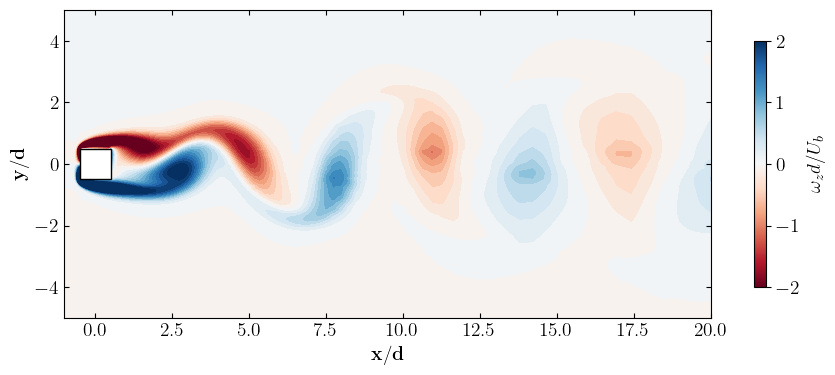

In [63]:
Rect1 = plt.Rectangle((-0.5, -0.5), 1, 1, ec='k', color='white')

fig, ax = plt.subplots(figsize=(11, 4))

p = ax.tricontourf(x/0.1, y/0.1, vorticity[:,2]*(d/Ub), levels = 1001, vmin=-2, vmax=2, cmap = 'RdBu')
m = plt.cm.ScalarMappable(cmap='RdBu')
m.set_array(vorticity[:,2]*(d/Ub))
m.set_clim(-2, 2)
plt.colorbar(m, ax=ax, shrink=0.8, label = r'$\omega_z d/U_b$')

ax.add_patch(Rect1)
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.set_xlim(-1, 20)
ax.set_ylim(-5, 5)
ax.set_aspect('equal')
ax.set_xlabel(r'$\bf x/d$')
ax.set_ylabel(r'$\bf y/d$')

# plt.savefig(save_path + 'Vorticity_New.jpeg', dpi = 300, bbox_inches = 'tight')

plt.show()